## Erschließungsstrategien für unbekannten Wortschatz von DaF-Lernenden an spanischen Universitäten (2017-19)
# Datenanalyse (3) - Biplots

#### Werkzeuge und Daten importieren

In [1]:
library(IRdisplay)
display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [2]:
MyData <- read.csv2(file="D:\\Daten\\DISS\\Daten\\Estrategias_Estudiantes_Analyse.csv", 
                    header=TRUE, sep=",", fileEncoding = "UTF-16")

#### Likert-Variablen auswählen

Spalten, die Likert-Items enthalten, werden ausgewählt und in Vektoren zusammengefasst.

In [3]:
get_vec <- function(df,name){
    vec <- c()
    for (i in 1:ncol(df)){
        if (grepl(name, colnames(df)[i]) & !grepl("TEXT",colnames(df)[i]) ){
            vec <- c(vec, i)
        }
    }
    vec
}

In [4]:
vec_AQ2 <- get_vec(MyData,"A.Q2")
vec_AQ3 <- get_vec(MyData,"A.Q3")
vec_CQ1 <- get_vec(MyData,"C.Q1")

#### Funktion für Datenformat (Integer)

In [5]:
convert_data <- function(df,cols){
    X <- df[,cols]
    X <- do.call(cbind.data.frame,lapply(X,function(x) as.integer(as.character(x))))
    colnames(X) <- colnames(df)[cols]
    X
}

### Faktorenanalyse

In [6]:
library("psych")

In [7]:
FA_AQ2 <- fa(convert_data(MyData,vec_AQ2), nfactors = 3, rotate = "varimax")

In [8]:
FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 6, rotate = "varimax")

In [9]:
FA_AQ3

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3), nfactors = 6, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR2   MR4   MR1   MR5   MR6   MR3    h2   u2 com
A.Q3_1  -0.02  0.08  0.07 -0.02 -0.04  0.51 0.277 0.72 1.1
A.Q3_2   0.11 -0.17  0.06  0.12  0.04  0.61 0.426 0.57 1.3
A.Q3_3  -0.04 -0.01  0.11  0.07  0.07  0.47 0.240 0.76 1.2
A.Q3_4  -0.01  0.10 -0.04  0.12  0.15  0.47 0.271 0.73 1.5
A.Q3_5   0.20  0.30  0.08  0.08  0.03  0.41 0.314 0.69 2.5
A.Q3_6   0.80  0.13  0.09  0.05 -0.05  0.09 0.682 0.32 1.1
A.Q3_7   0.79  0.19  0.12  0.13 -0.02  0.04 0.696 0.30 1.2
A.Q3_8   0.80  0.17  0.12  0.10  0.02 -0.04 0.700 0.30 1.2
A.Q3_9   0.54  0.16  0.06  0.16  0.10  0.05 0.361 0.64 1.5
A.Q3_28  0.22  0.18  0.15  0.40  0.08  0.11 0.282 0.72 2.7
A.Q3_10  0.40  0.49  0.03  0.17  0.09 -0.02 0.436 0.56 2.3
A.Q3_11  0.24  0.72  0.07  0.16  0.07  0.03 0.608 0.39 1.4
A.Q3_12  0.22  0.62  0.13  0.18  0.02  0.04 0.4

In [10]:
#write.csv2(FA_AQ3$weights, file ="D:\\Daten\\DISS\\Daten\\FA_weights.csv",row.names=TRUE)

Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ2):

* MR1: Kenntnisse des Deutschen nutzen (inkl. Kontext)
* MR2: Soziale Strategien
* MR3: Sprachkenntnisse nutzen (insbes. weitere Sprachen, Erstsprache)


Hypothese zum Ergebnis der explorativen Faktorenanalyse (AQ3):

* MR1: Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* MR2: intralinguale Hinweise (Wortbildung, morphosyntaktische Regularitäten, Orthographie) + Konnektoren, Erklärungshilfen
* MR3: interlinguale Hinweise (inkl. Ethymologie)
* MR4: engerer Kontext, Analyse auf Satzebene (Syntax, semantische Relationen)
* MR5: metakognitive Strategien
* MR6: Bilder, Grafiken, Symbole, Zahlen, Kommunikationssituation


### MANOVA AQ2, AQ3

Matrix AQ2:

In [11]:
A2 = convert_data(MyData,vec_AQ2)
A2[is.na(A2)] <- 0 
A2 <- as.matrix(A2)

B2 = FA_AQ2$weights
B2 <- as.matrix(B2)

C2 <- A2 %*% B2

In [12]:
Df_total2 <- merge(MyData,C2,by=0, sort=FALSE)
Df_total2[Df_total2 == 0] <- NA
#Df_total2[is.na(Df_total2)] <- 0

Matrix AQ3:

In [13]:
A = convert_data(MyData,vec_AQ3)
A[is.na(A)] <- 0 
A <- as.matrix(A)

B = FA_AQ3$weights
B <- as.matrix(B)

C <- A %*% B

In [14]:
Df_total <- merge(MyData,C,by=0, sort=FALSE)
Df_total[Df_total == 0] <- NA
#Df_total[is.na(Df_total)] <- 0

Vektoren mit zu untersuchenden Variablen:

In [15]:
vec_V <- get_vec(Df_total,"V_")
vec_W <- get_vec(Df_total,"W_")

In [16]:
colnames(Df_total[,vec_V])

[1] "V_L1.Bi.Trilingualismus" "V_Studienrichtung"      
 [3] "V_Niveau_DK"             "V_Alter"                
 [5] "V_Geschlecht"            "V_Erstsprache_Span"     
 [7] "V_Spr_Zahl"              "V_Spr_Fran"             
 [9] "V_Spr_Germ"              "V_Spr_Rom"              
[11] "V_Spr_Slaw"              "V_Spr_Asiat"            
[13] "V_Spr_Klass"             "V_E_Schule_LL"          
[15] "V_E_Schule_Eng"          "V_E_Schule_Spr"         
[17] "V_E_Univ_DK"             "V_E_Univ_andere"        
[19] "V_E_Sprachschule"        "V_E_DK_aktuell"         
[21] "V_E_Sozial"              "V_E_autonom"            
[23] "V_Met_Erkl"              "V_Met_Tipps"            
[25] "V_Met_Training"          "V_Met_Vgl"              
[27] "V_Met_Reflexion"         "V_Met_unbewusst"

In [17]:
#vec_V

In [18]:
remove <- c(67)
#vec_V[!vec_V %in% remove]

Die Variable an Position 67 ("Niveau des aktuellen Deutschkurses") wird im Fall der Analyse getrennt nach Niveaustufen nicht berücksichtigt.

In [19]:
#colnames(Df_total[,vec_V[!vec_V %in% remove]])

In [20]:
for (v in vec_V){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_V){Df_total2[,v] <- as.factor(Df_total2[,v])}
for (v in vec_W){Df_total[,v] <- as.factor(Df_total[,v])}
for (v in vec_W){Df_total2[,v] <- as.factor(Df_total2[,v])}

Ergebnisse der MANOVA: vgl. Datenanalyse_3

### Biplots

Funktionen:

In [21]:
# Using non vectorial programming (for rather than matrices) is less efficient
# except for large data matices
TransformIni <- function(X, InitTransform="None", transform = "Standardize columns") {
  n = nrow(X)
  p = ncol(X)
  RowNames = rownames(X)
  ColNames = colnames(X)
  
  InitTransforms=c("None", "Log", "Logit")
  if (is.numeric(InitTransform)) 
    InitTransform = InitTransforms[InitTransform]
  
  
  ContinuousDataTransform = c("Raw Data", "Substract the global mean", "Double centering", "Column centering", "Standardize columns", "Row centering", 
                              "Standardize rows", "Divide by the column means and center", "Normalized residuals from independence")
  if (is.numeric(transform)) 
    transform = ContinuousDataTransform[transform]
  
  switch(InitTransform, `Log` = {
    if (sum(which(X<=0)) >0) stop("Initial log transformation is not compatible with negative or zero values")
    X = log(X)
    if (nfs > 0) sup.rows = log(sup.rows)
    if (ncs > 0) sup.cols = log(sup.cols)
  },`Logit` = {
    if (sum(which(X<=0)) >0) stop("Initial logit transformation is not compatible with negative values")
    X= X + 0.01 * (X==0) - 0.01 * (X==1)
    x=log(X/(1-X))
  })
  
  
  switch(transform, `Substract the global mean` = {
    gmean = mean(X)
    X = X - gmean
  }, `Double centering` = {
    X = (diag(n) - matrix(1, n, n)/n) %*% X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Column centering` = {
    means = apply(X, 2, mean)
    X=X- matrix(1,n,1) %*% matrix(means,1,p)
  }, `Standardize columns` = {
    means = apply(X, 2, mean)
    stdDevs = apply(X, 2, sd)
    X=(X- matrix(1,n,1) %*% matrix(means,1,p))/(matrix(1,n,1) %*% matrix(stdDevs,1,p))
  }, `Row centering` = {
    means = apply(X, 1, mean)
    X = X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Standardize rows` = {
    means = apply(X, 1, mean)
    stdDevs = apply(X, 1, sd)
    X = solve(diag(stdDevs)) %*% X %*% (diag(p) - matrix(1, p, p)/p)
  }, `Divide by the column means and center` = {
    means = apply(X, 2, mean)
    for (i in (1:p)) X[, i] = X[, i]/means[i]
    X = (diag(n) - matrix(1, n, n)/n) %*% X
  }, `Normalized residuals from independence` = {
    nt = sum(sum(X))
    dr = apply(X,1,sum)
    dc = apply(X,2,sum)
    esp = (t(t(dr)) %*% dc)/nt
    var = t(t(1 - dr/nt)) %*% (1 - dc/nt)
    xp = ((xp - esp)/sqrt(esp))/sqrt(var)
  },`Divide by the range`={
    Rangos=apply(X,2,max)-apply(X,2,min)
    X=X%*%diag(1/Rangos)
  })
  rownames(X) = RowNames
  colnames(X) = ColNames
  return(X)
}

In [22]:
Factor2Binary <- function(y, Name=NULL){  
  if (is.null(Name)) Name="C-"
  ncat=length(levels(y))
  n=length(y)
  Z=matrix(0,n,ncat)
  for (i in 1:n)
    Z[i,as.numeric(y[i])]=1
  colnames(Z) <- paste(Name,levels(y),sep="")
  return(Z)
}

In [23]:
matrixsqrt <- function(S, tol = sqrt(.Machine$double.eps))
{
  ## Square root of a Matrix
  s <- svd(S)
  nz <- s$d > tol
  S12=s$u[, nz] %*% diag(sqrt(s$d[nz])) %*% t(s$v[, nz])
  return(S12)
}

In [24]:
matrixsqrtinv <- function(S, tol = sqrt(.Machine$double.eps))
{
  ## Square root of a Matrix
  s <- svd(S)
  nz <- s$d > tol
  S12=s$u[, nz] %*% diag(1/sqrt(s$d[nz])) %*% t(s$v[, nz])
  return(S12)
}

In [25]:
CanonicalBiplot <- function(X, group, SUP = NULL, InitialTransform = 5, LDA=FALSE, MANOVA = FALSE) {

  cl <- match.call()

  ContinuousDataTransform = c("Raw Data", "Substract the global mean", "Double centering",
                              "Column centering", "Standardize columns", "Row centering",
                              "Standardize rows", "Divide by the column means and center",
                              "Normalized residuals from independence", "Divide by the range",
                              "Within groups standardization", "Ranks")
  if (is.numeric(InitialTransform))
    InitialTransform = ContinuousDataTransform[InitialTransform]

	Bip = list() #Container for the solution
	Bip$call=cl
	# Setting the properties of data
	if (is.null(rownames(X)))
		rownames(X) <- rownames(X, do.NULL = FALSE, prefix = "I")
	RowNames = rownames(X)
	if (is.null(colnames(X)))
		colnames(X) <- colnames(X, do.NULL = FALSE, prefix = "V")
	VarNames = colnames(X)

	Bip$Title = "Canonical/MANOVA Biplot"
	Bip$Type = "Canonical"
	Bip$Non_Scaled_Data = X
	Bip$Means = apply(X, 2, mean)
	Bip$Medians = apply(X, 2, median)
	Bip$Deviations = apply(X, 2, sd)
	Bip$Minima = apply(X, 2, min)
	Bip$Maxima = apply(X, 2, max)
	Bip$P25 = apply(X, 2, quantile)[2, ]
	Bip$P75 = apply(X, 2, quantile)[4, ]
	Bip$GMean = mean(as.matrix(X))
  Bip$Initial_Transformation=InitialTransform
	X = TransformIni(as.matrix(X), transform = InitialTransform) # Initial transformation
	rownames(X) <- RowNames
	if (is.factor(group)) {
		GroupNames = levels(group)
	}
	g = length(levels(group))
	n = dim(X)[1]
	m = dim(X)[2]
	r = min(c(g - 1, m))
	Bip$ncols=m
  Bip$nrows=n
  Bip$dim=r
  if (LDA) {Bip$LDA=lda(X,group)
	Bip$Predict=predict(Bip$LDA,X)$class
	Bip$ClassificationTable = table(group, Bip$Predict)
	Bip$PercentCorrect=diag(prop.table(Bip$ClassificationTable, 1))
	names(Bip$PercentCorrect)=GroupNames
	Bip$TotalPercentCorrect=sum(diag(prop.table(Bip$ClassificationTable)))
	names(Bip$TotalPercentCorrect)= "Total"}
  
  
  if (MANOVA) Bip$MANOVA = manova(X ~ group)

	DimNames = "Dim 1"
	for (i in 2:r) DimNames = c(DimNames, paste("Dim", i))
	Z = Factor2Binary(group) # Matrix of indicators
	ng = colSums(Z)
	S11 = t(Z) %*% Z
	Xb = solve(S11) %*% t(Z) %*% X
	B = t(Xb) %*% S11 %*% Xb
	S = t(X) %*% X - B
	Y = (S11^0.5) %*% Xb %*% matrixsqrtinv(S)
	SV = svd(Y)

	H = matrixsqrt(S) %*% SV$v[, 1:r] # Variable coordinates
	B = matrixsqrtinv(S) %*% SV$v[, 1:r] # Canonical Weigths
	J = Xb %*% B # Center Coordinates
	V = X %*% B # Individual Coordinates
	if (!is.null(SUP)) {
		VS = SUP %*% B
		rownames(VS)=rownames(SUP)
		colnames(VS)=DimNames
		# Bip$SupPredict=predict(Bip$LDA,SUP)$class
	}
	else {
		VS=NULL
		Bip$SupPredict=NULL}

	# Inertia, ANOVAs for each Canonical Variate and MANOVA
	sct = diag(t(V) %*% V)
	sce = diag(t(J) %*% S11 %*% J)
	scr = sct - sce
	fs = (sce/(g - 1))/(scr/(n - g))
	signif2 = df(fs, (g - 1), (n - g))

	vprop = SV$d[1:r]
	iner = (vprop^2/sum(vprop^2)) * 100
	acum = cumsum(iner)

	Bip$EigenValues = vprop
	Bip$Inertia = iner
	Bip$CumInertia = acum
	# colnames(Bip$EigenValues) <- c("Eigenvalue", "Explained Variance", "Cummulative")
	# rownames(Bip$EigenValues) <- DimNames

	lambda = vprop^2
	pill = 1/(1 + lambda)
	pillai = det(diag(pill))
	glh = g - 1
	gle = n - g
	t = ((glh^2 * m^2 - 4)/(m^2 + glh^2 - 5))^0.5
	w = gle + glh - 0.5 * (m + glh + 1)
	df1 = m * glh
	df2 = w * t - 0.5 * (m * glh - 2)
	Bip$Wilksf = ((1 - pillai^(1/t))/(pillai^(1/t))) * (df2/df1)
	Bip$Wilksp = 1 - pf(Bip$Wilksf, df1, df2)

	Bip$GroupContributions = diag(1/rowSums(J^2)) %*% J^2
	Bip$ColContributions = diag(1/rowSums(H^2)) %*% H^2

	Bip$ExplTotal = matrix(0, r, 1)
	Bip$RowContributions = matrix(0, n, r)
	Bip$QLRVars = matrix(0, m, r)

	SCT = sum(X^2)
	SCRows = rowSums(X^2)
	SCCols = colSums(X^2)

	for (j in 1:r) {
		Fitted = V[, 1:j] %*% t(H[, 1:j])
		residuals = X - Fitted
		Bip$ExplTotal[j] = 1 - sum(residuals^2)/SCT
		Bip$RowContributions[, j] = 1 - rowSums(residuals^2)/SCRows
		Bip$QLRVars[, j] = 1 - colSums(residuals^2)/SCCols
	}


	FitX = V %*% t(H)
	Resid = X - FitX

	SCR = sum(Resid^2)
	FIT = 1 - (SCR/SCT)

	sctotal = diag(t(X) %*% X)

	scdentro = diag(S)
	scentre = sctotal - scdentro
	fs = (scentre/glh)/(scdentro/gle)
	pval = 1 - pf(fs, glh, gle)

	Bip$ANOVAS = cbind(sctotal, scentre, scdentro, fs, pval)
	colnames(Bip$ANOVAS) <- c("Total", "Groups", "Error", "F", "p-val")

	falfau = qt(1 - (0.025), (n - g))
	falfab = qt(1 - (0.025/(g * m)), (n - g))
	falfam = sqrt(qf(1 - 0.05, m, (n - g - m + 1)) * (((n - g) * m)/(n - g - m + 1)))
	falfac = sqrt(qchisq(0.95, 2))

	Bip$UnivRad = falfau * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$BonfRad = falfab * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$MultRad = falfam * diag(solve(sqrt(S11)))/sqrt(n - g)
	Bip$ChisRad = falfac * diag(solve(sqrt(S11)))/sqrt(n - g)

	Bip$n = n
	Bip$p = m
	Bip$g = g
	Bip$X = X
	Bip$groups = group

	Bip$RowCoordinates = V
	rownames(Bip$RowCoordinates) = RowNames
	colnames(Bip$RowCoordinates) = DimNames
	Bip$Sup_Individual_Coord = VS
	Bip$ColCoordinates = H
	rownames(Bip$ColCoordinates) = VarNames
	colnames(Bip$ColCoordinates) = DimNames
	Bip$GroupCoordinates = J
	rownames(Bip$GroupCoordinates) = GroupNames
	colnames(Bip$GroupCoordinates) = DimNames
	Bip$Canonical_Weights = B
	rownames(Bip$Canonical_Weights) = VarNames
	colnames(Bip$Canonical_Weights) = DimNames
	Bip$Structure_Correlations = cor(X, V)
	rownames(Bip$Structure_Correlations) = VarNames
	colnames(Bip$Structure_Correlations) = DimNames
	rownames(Bip$GroupContributions) = GroupNames
	colnames(Bip$GroupContributions) = DimNames
	rownames(Bip$ColContributions) = VarNames
	colnames(Bip$ColContributions) = DimNames
	rownames(Bip$QLRVars) = VarNames
	colnames(Bip$QLRVars) = DimNames
	
	  NGroups=length(levels(group))
	  Bip$Clusters = group
	  Bip$ClusterNames = levels(group)
	
	palette(rainbow(NGroups))
	ClusterColors = palette()
	Bip$ClusterType="us"
	Bip$ClusterColors=ClusterColors
	

	class(Bip) <- "Canonical.Biplot"
	return(Bip)
}

In [26]:
library(ggplot2)


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



### AQ2

##### Studienrichtung

In [27]:
X <- Df_total2[!is.na(Df_total2$V_Studienrichtung),cbind("MR1","MR2","MR3")] 
y <- as.factor(Df_total2[!is.na(Df_total2$V_Studienrichtung),]$V_Studienrichtung)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('Germ','Phil','Trans','Andere')
rownames(CoordGrupos) <- c('Germ','Phil','Trans','Andere')

In [28]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.5188123,0.10915536,3.720323e-01
MR2,0.1627530,0.83722063,2.636626e-05
MR3,0.2327779,0.06293294,7.042892e-01


In [29]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,9.860663e-01,0.0004959842,0.013437669
2,9.344898e-01,0.0471117897,0.018398387
3,6.081595e-05,0.0075506739,0.992388510
4,2.478667e-01,0.7492022875,0.002931056


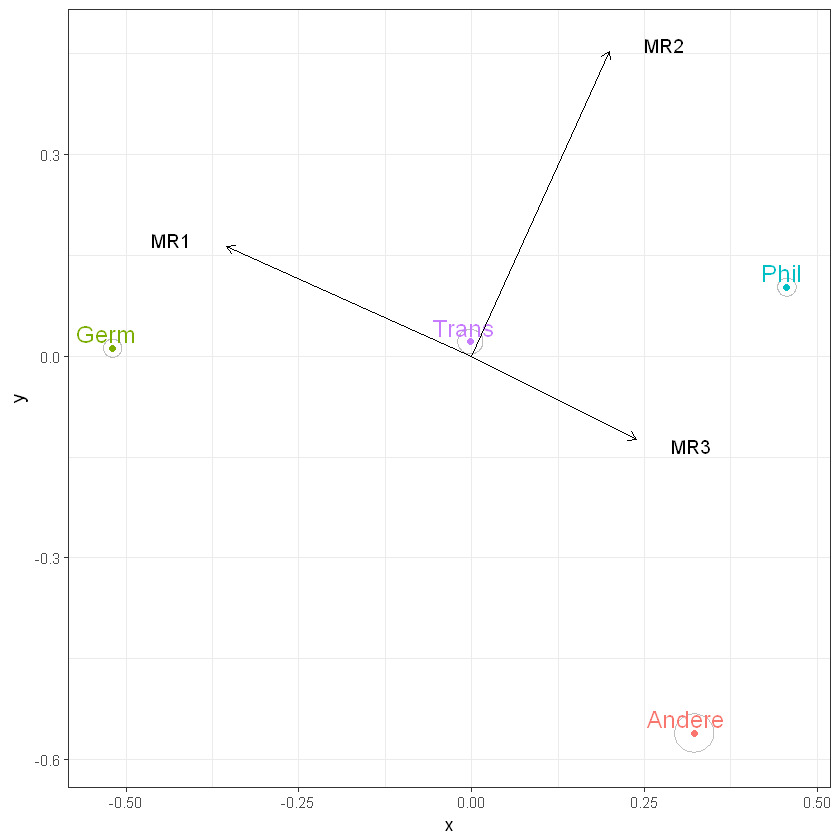

In [30]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

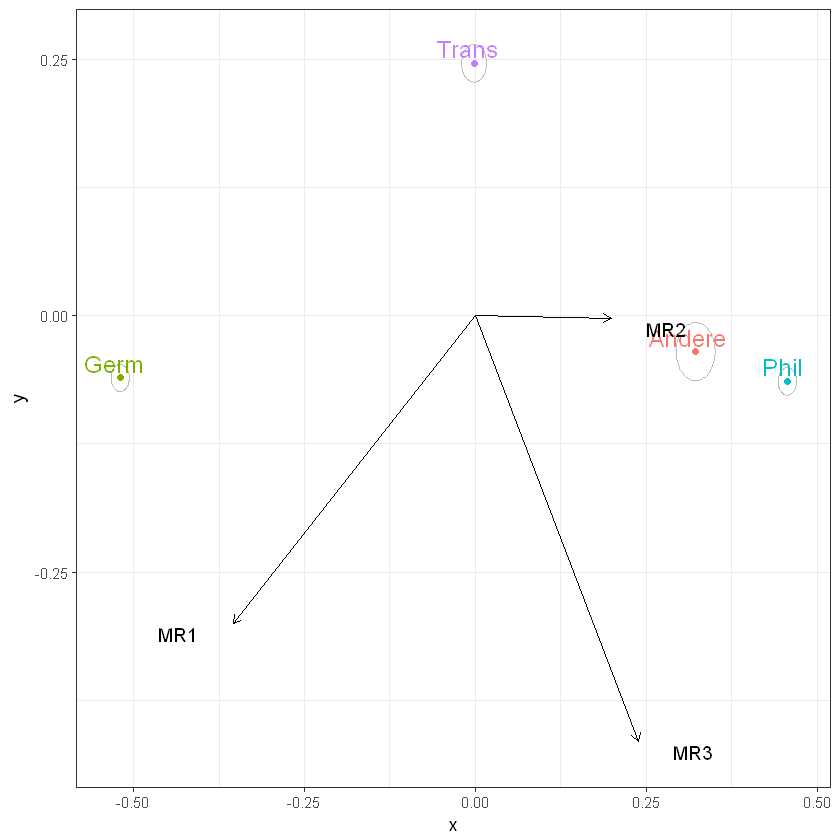

In [31]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

##### Niveau des aktuellen Deutschkurses

In [32]:
X <- Df_total2[!is.na(Df_total2$V_Niveau_DK),cbind("MR1","MR2","MR3")]
y <- as.factor(Df_total2$V_Niveau_DK)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('A1','A2','B1','B2','C')
rownames(CoordGrupos) <- c('A1','A2','B1','B2','C')

In [33]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.5821401,0.224350547,0.19350938
MR2,0.1498195,0.009637163,0.84054334
MR3,0.1180228,0.867835562,0.01414166


In [34]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.9926261,0.005047898,0.002326012
2,0.5865973,0.278676556,0.134726191
3,0.5095126,0.489280895,0.001206524
4,0.7975089,0.145322001,0.057169107
5,0.9308971,0.029688501,0.039414438


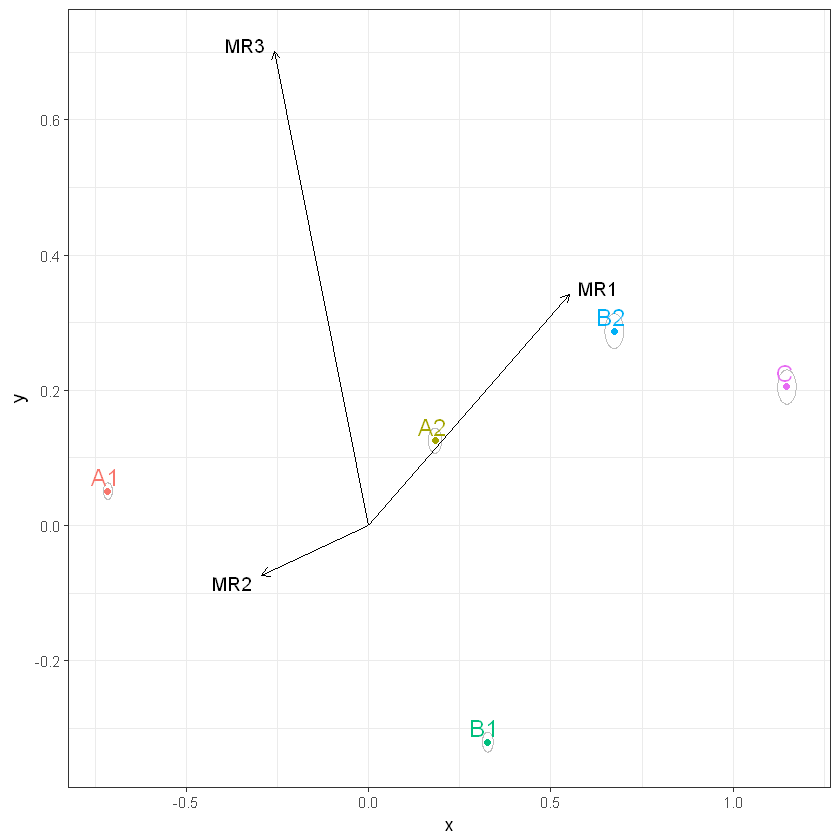

In [35]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

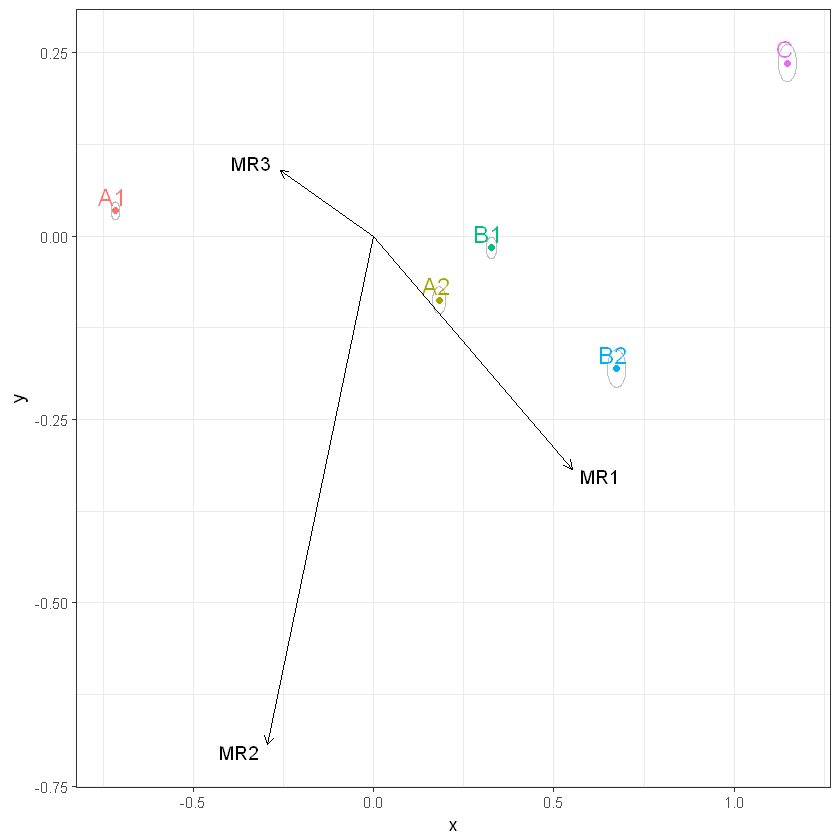

In [36]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

##### Alter

In [37]:
X <- Df_total2[!is.na(Df_total2$V_Alter),cbind("MR1","MR2","MR3")]
y <- as.factor(Df_total2[!is.na(Df_total2$V_Alter),]$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20-21','22+')
rownames(CoordGrupos) <- c('-18','19','20-21','22+')

In [38]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,7.088971e-01,0.032813136,0.25828975
MR2,2.592723e-01,0.008853162,0.73187454
MR3,6.180236e-05,0.969117774,0.03082042


In [39]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.8587657,0.1412181,1.620988e-05
2,0.1125177,0.8593909,2.809146e-02
3,0.2565604,0.6645056,7.893394e-02
4,0.8865664,0.1125873,8.463131e-04


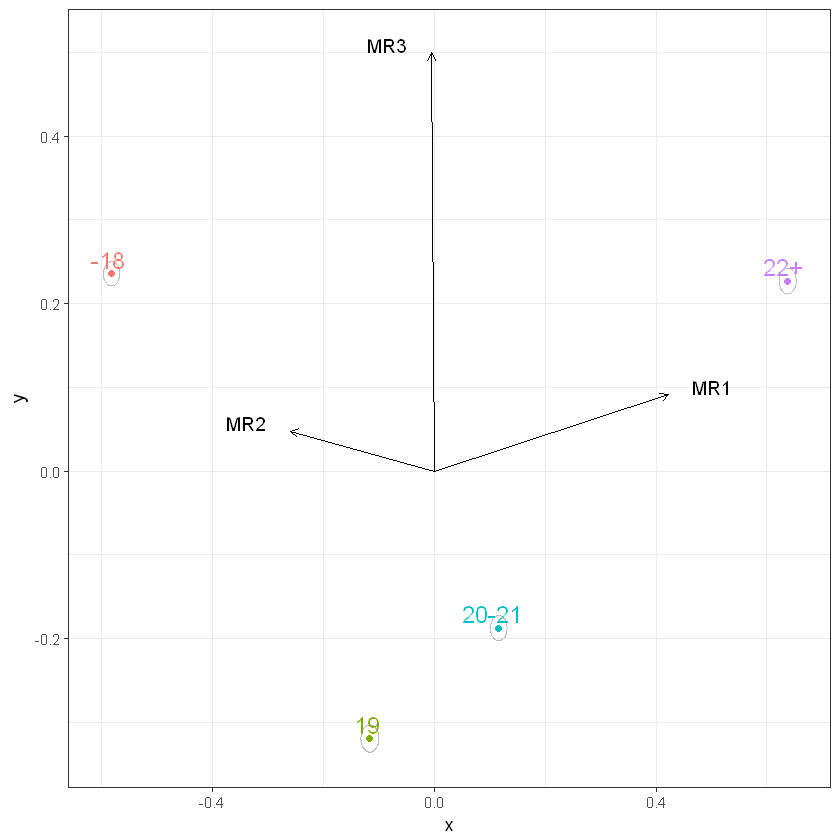

In [40]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

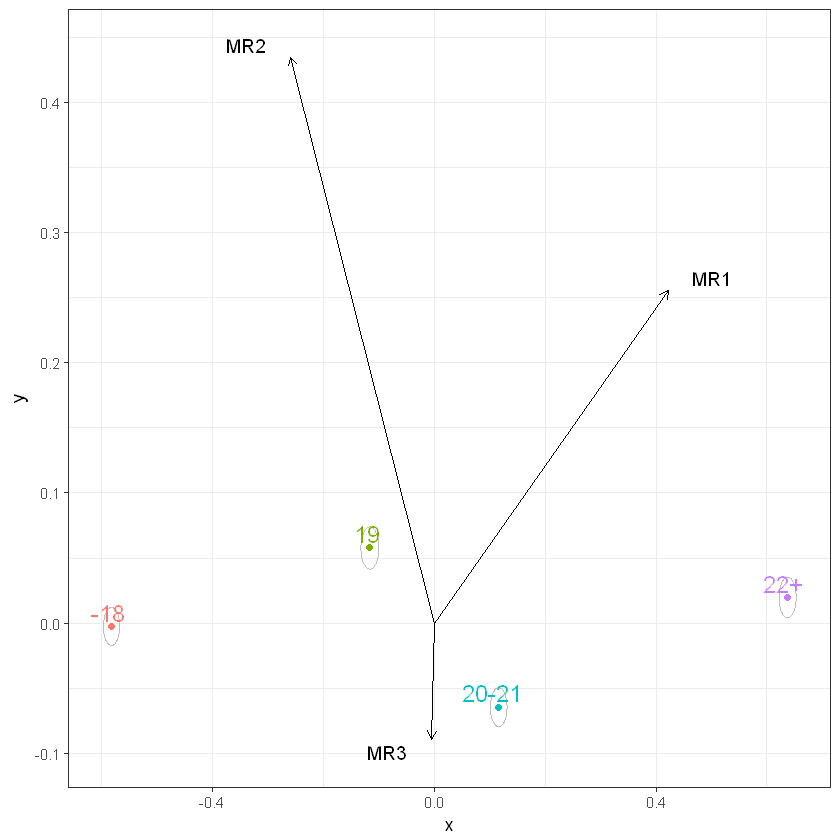

In [41]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

### AQ3

##### Studienrichtung

In [42]:
X <- Df_total[!is.na(Df_total$V_Studienrichtung),cbind("MR1","MR2","MR3","MR4","MR5","MR6")] 
y <- as.factor(Df_total[!is.na(Df_total$V_Studienrichtung),]$V_Studienrichtung)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('Germ','Phil','Trans','Andere')
rownames(CoordGrupos) <- c('Germ','Phil','Trans','Andere')

In [43]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.09991717,0.01173603,0.888346801
MR2,0.84861977,0.05345523,0.097924998
MR3,0.92460048,0.00252171,0.072877808
MR4,0.07142239,0.00179934,0.926778269
MR5,0.04631217,0.81490322,0.138784610
MR6,0.03310246,0.96520421,0.001693326


In [44]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.9950867,0.004534434,0.0003788631
2,0.7088398,0.290667621,0.0004925346
3,0.2495376,0.675905092,0.0745572586
4,0.2726230,0.690562402,0.0368145513


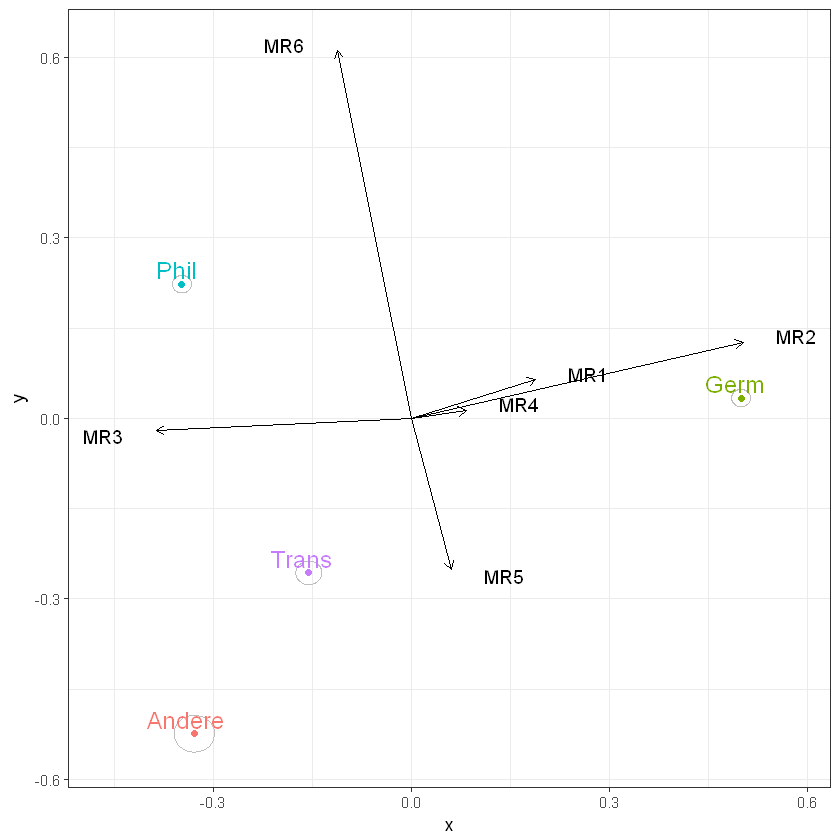

In [45]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

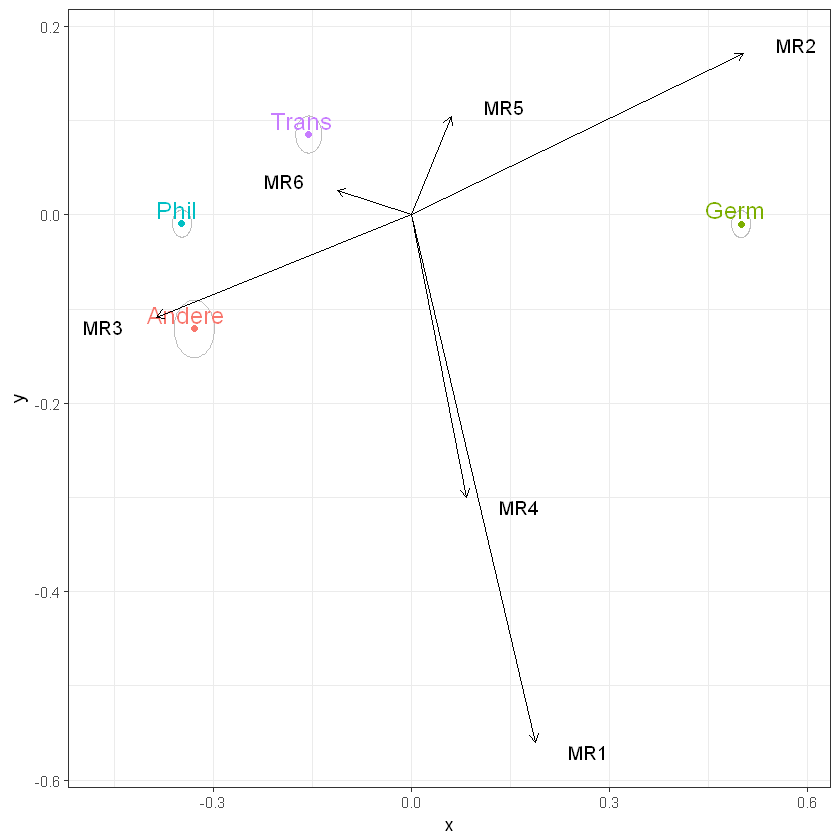

In [46]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

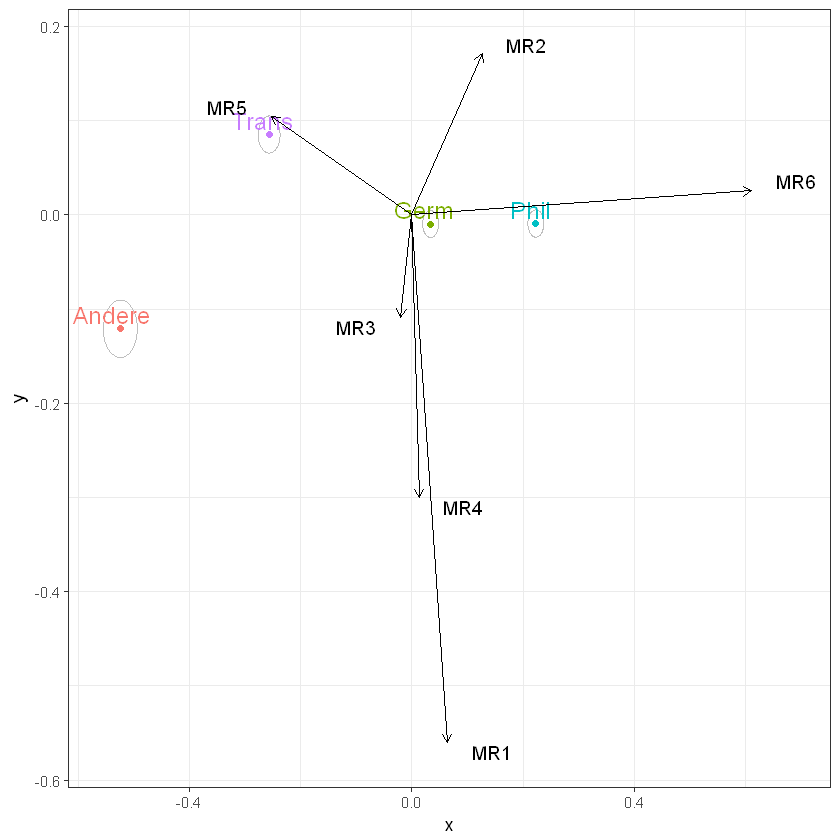

In [47]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

##### Niveau des aktuellen Deutschkurses

In [48]:
X <- Df_total[!is.na(Df_total$V_Niveau_DK),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total$V_Niveau_DK)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('A1','A2','B1','B2','C')
rownames(CoordGrupos) <- c('A1','A2','B1','B2','C')

In [49]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3,Dim 4
MR1,0.16356850,0.026355198,0.62544578,0.18463052
MR2,0.90340667,0.003009528,0.01835685,0.07522695
MR3,0.14193857,0.716740601,0.07195165,0.06936918
MR4,0.09728555,0.265870909,0.01221827,0.62462527
MR5,0.03490644,0.240562818,0.49780753,0.22672322
MR6,0.04137731,0.049515618,0.85463145,0.05447562


In [50]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3,Dim 4
1,0.9927314,0.006523764,0.0006223361,1.225071e-04
2,0.6254822,0.173338553,0.1086000557,9.257920e-02
3,0.4609709,0.538057243,0.0007411524,2.307419e-04
4,0.6385039,0.310178171,0.0423304983,8.987441e-03
5,0.6888405,0.293796923,0.0173495817,1.298343e-05


In [51]:
#CoordGrupos$clase <- c('Spr_1','Spr_2','Spr_3','Spr_4')
#rownames(CoordGrupos) <- c('Spr1','Spr2','Spr3','Spr4')

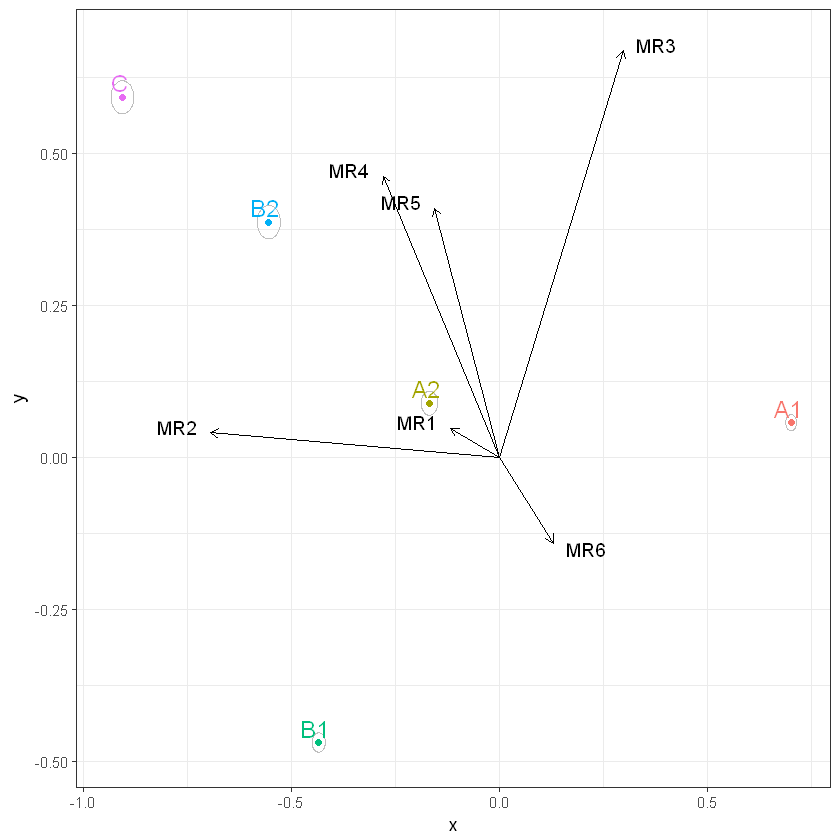

In [52]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

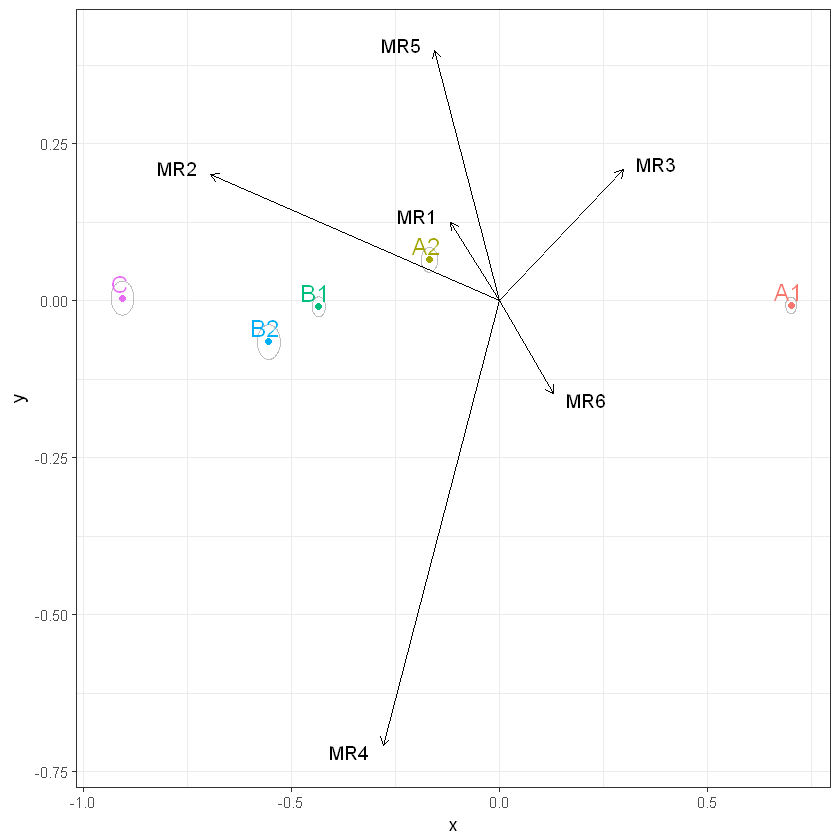

In [53]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,4]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 4`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 4`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 4`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 4`+.01*sign(CoordVar$`Dim 4`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

##### Alter

In [54]:
X <- Df_total[!is.na(Df_total$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total[!is.na(Df_total$V_Alter),]$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20-21','22+')
rownames(CoordGrupos) <- c('-18','19','20-21','22+')

In [55]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.791563983,0.0066137833,0.2018222
MR2,0.861502666,0.0008190312,0.1376783
MR3,0.248720818,0.3434437471,0.4078354
MR4,0.254757663,0.3095463824,0.4356960
MR5,0.004396983,0.7181937455,0.2774093
MR6,0.068633659,0.6763553198,0.2550110


In [56]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.8653617,0.1110603,0.023577998
2,0.4723673,0.1852779,0.342354878
3,0.2988942,0.6133249,0.087780894
4,0.8387799,0.1582586,0.002961436


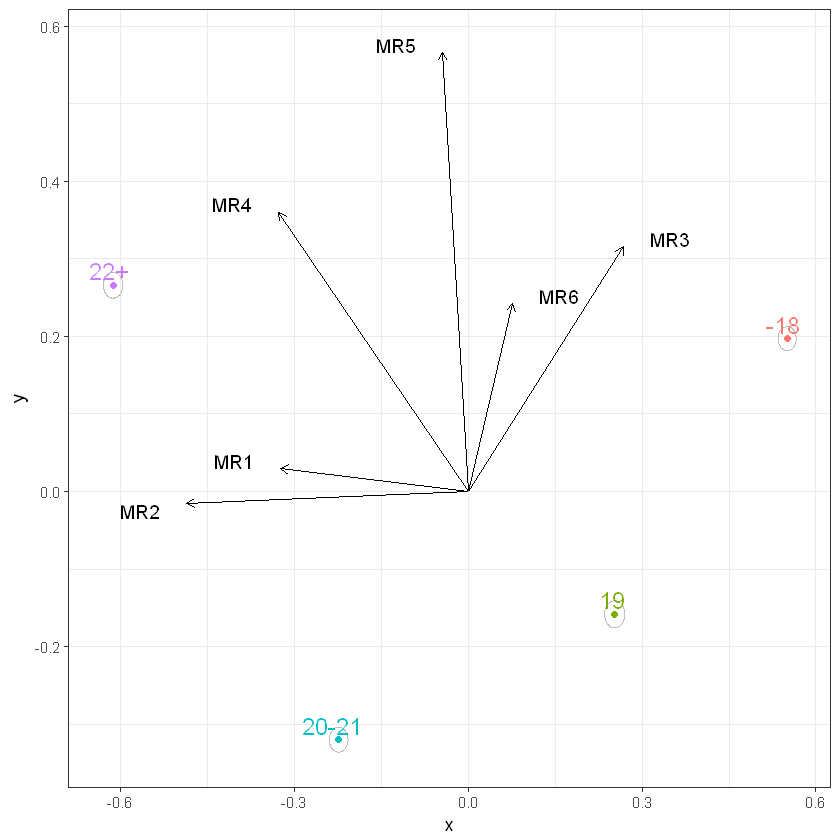

In [57]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

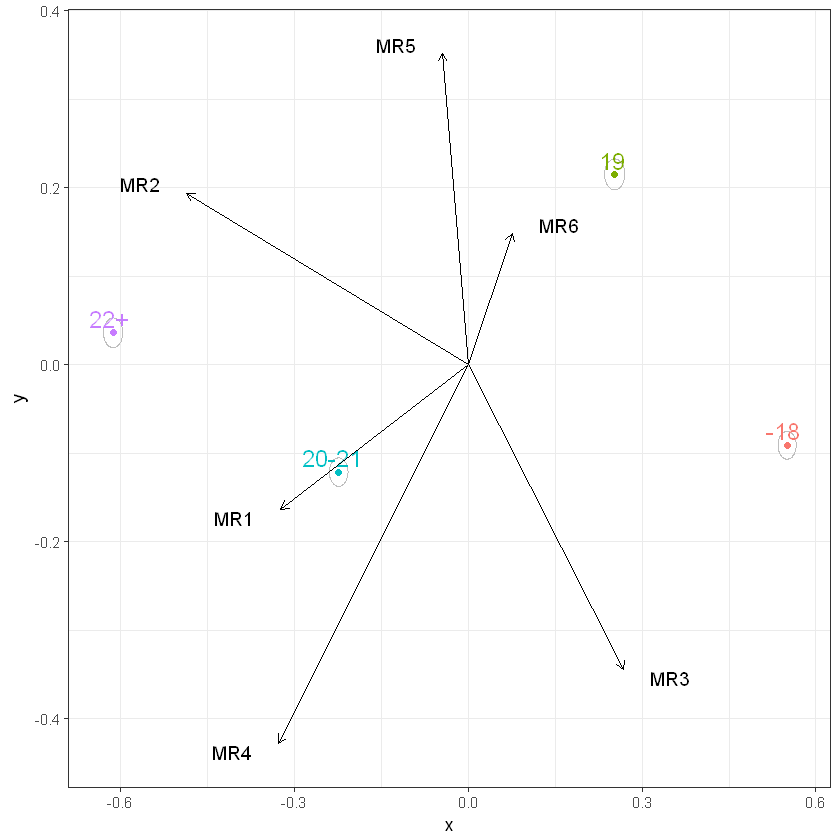

In [58]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

#### A1 (AQ3)

In [59]:
Df_total_A1 <- Df_total[which(Df_total$V_Niveau_DK=='1'),]

##### Studienrichtung

In [60]:
X <- Df_total_A1[!is.na(Df_total_A1$V_Studienrichtung),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A1[!is.na(Df_total_A1$V_Studienrichtung),]$V_Studienrichtung)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('Germ','Phil','Trans','Andere')
rownames(CoordGrupos) <- c('Germ','Phil','Trans','Andere')

In [61]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.32246122,0.046896347,0.6306424
MR2,0.42751315,0.353818042,0.2186688
MR3,0.37711782,0.001517913,0.6213643
MR4,0.01288809,0.578673742,0.4084382
MR5,0.36129120,0.497957883,0.1407509
MR6,0.53987311,0.303016545,0.1571103


In [62]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.83594296,0.1629153,0.001141752
2,0.08150024,0.9162653,0.002234460
3,0.81814905,0.1372259,0.044625079
4,0.48973349,0.1628480,0.347418545


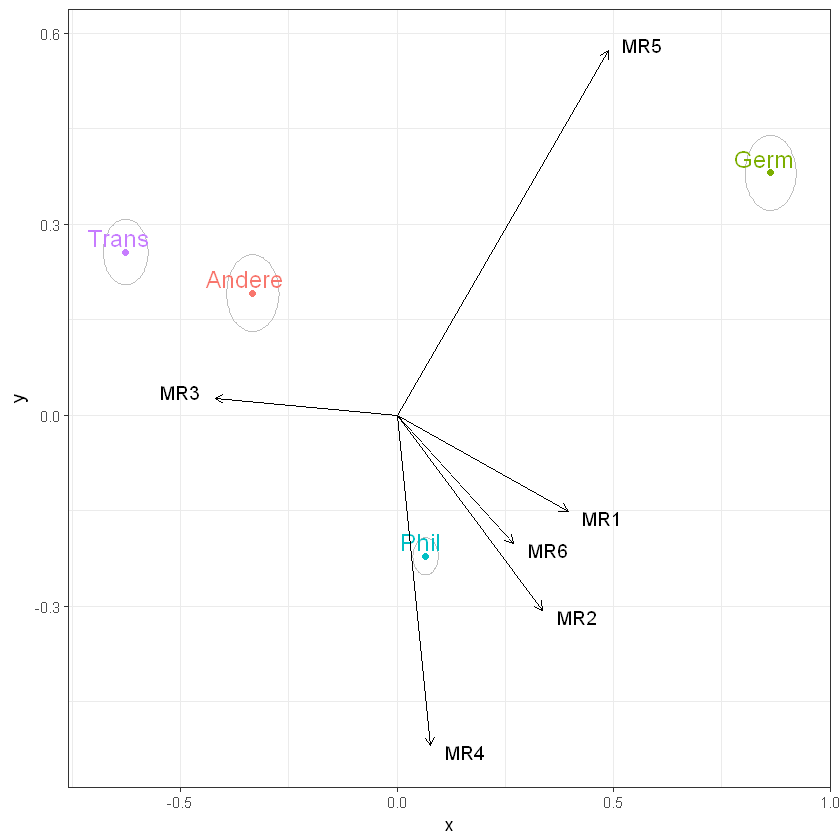

In [63]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

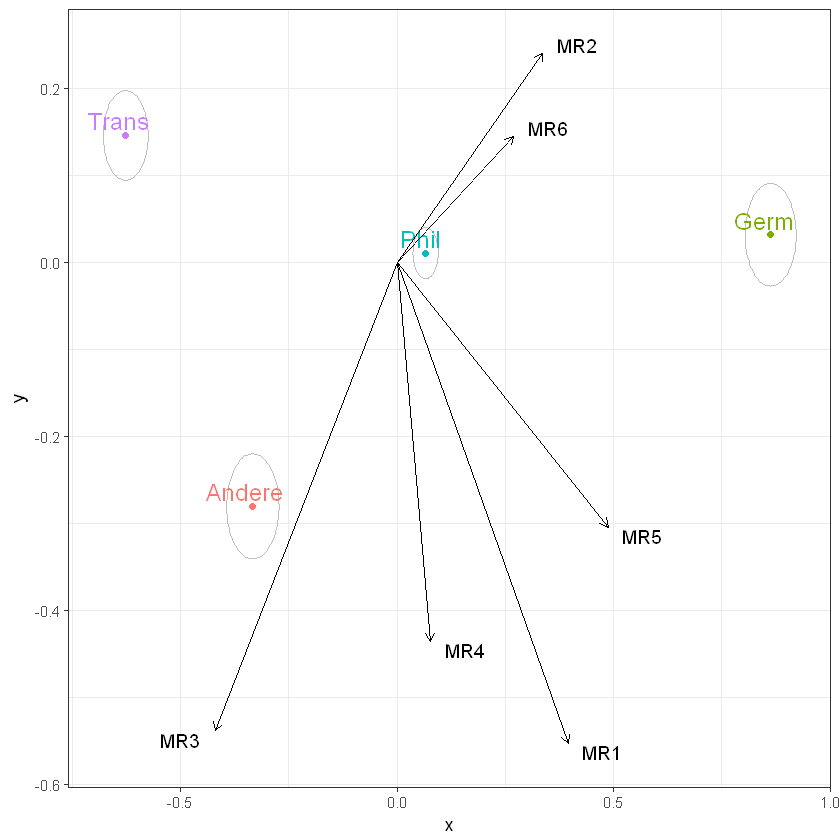

In [64]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

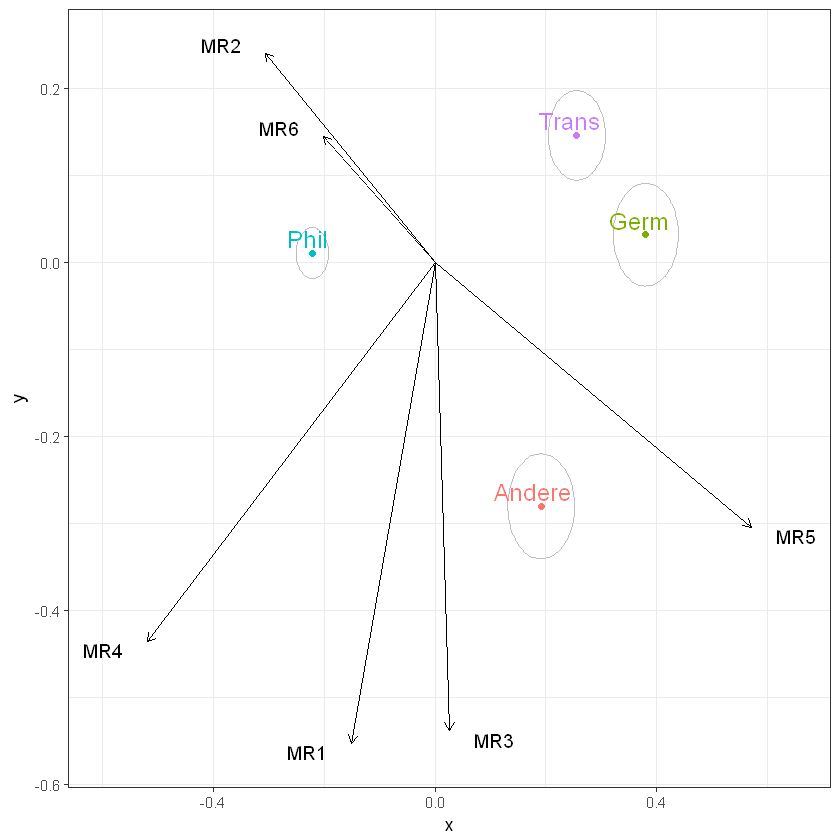

In [65]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

#### A2 (AQ3)

In [66]:
Df_total_A2 <- Df_total[which(Df_total$V_Niveau_DK=='2'),]

##### Alter

In [67]:
X <- Df_total_A2[!is.na(Df_total_A2$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_A2[!is.na(Df_total_A2$V_Alter),]$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20-21','22+')
rownames(CoordGrupos) <- c('-18','19','20-21','22+')

In [68]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.096999587,0.11310893,0.78989148
MR2,0.575299994,0.38784797,0.03685204
MR3,0.163341412,0.68360933,0.15304925
MR4,0.001564054,0.77935401,0.21908194
MR5,0.931981620,0.06301356,0.00500482
MR6,0.130796631,0.22616593,0.64303744


In [69]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.1112045,0.869554213,0.01924124
2,0.3236111,0.005308858,0.67108009
3,0.8258612,0.034752736,0.13938606
4,0.5077238,0.480155822,0.01212037


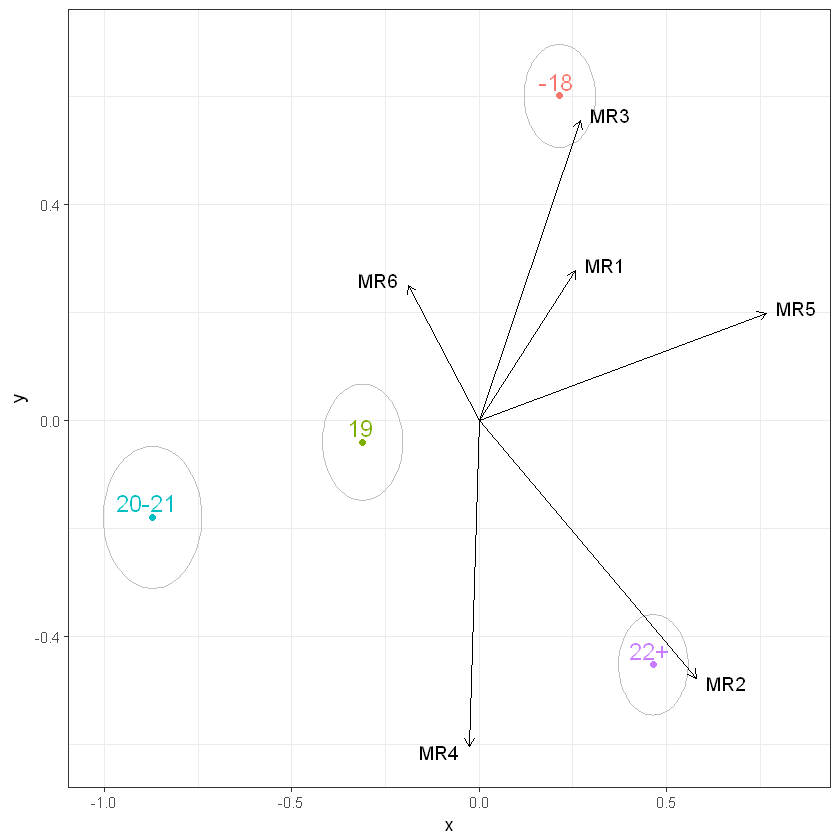

In [70]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

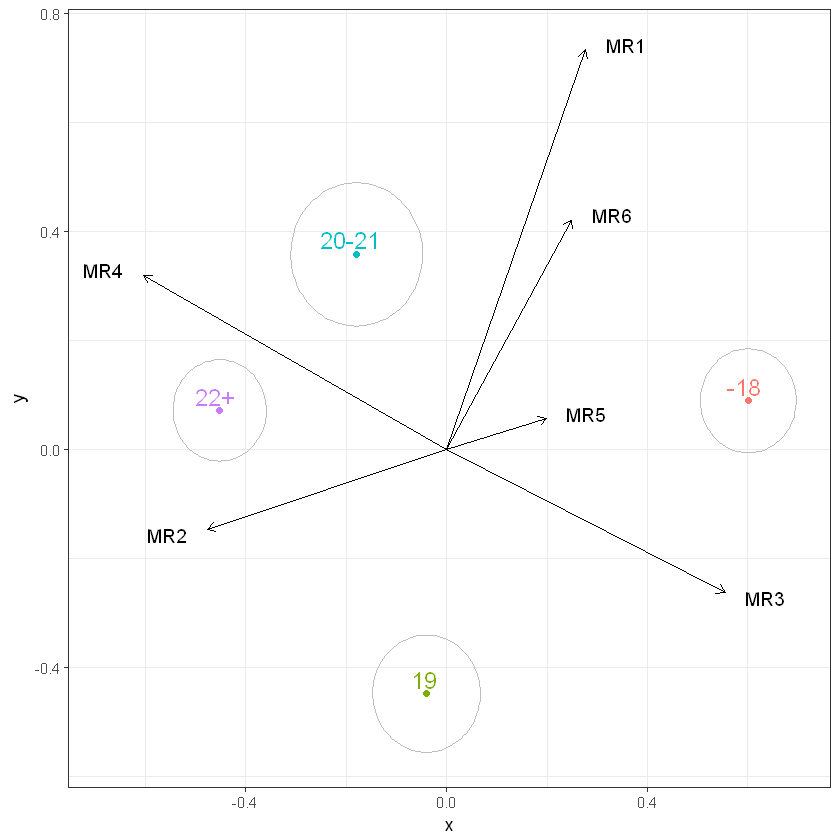

In [71]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

#### B1 (AQ3)

In [72]:
Df_total_B1 <- Df_total[which(Df_total$V_Niveau_DK=='3'),]

##### Alter

In [73]:
X <- Df_total_B1[!is.na(Df_total_B1$V_Alter),cbind("MR1","MR2","MR3","MR4","MR5","MR6")]
y <- as.factor(Df_total_B1[!is.na(Df_total_B1$V_Alter),]$V_Alter)

Totalcanbip <- CanonicalBiplot(X,y )

#Rescalar resultados
sca <- sum(Totalcanbip$GroupCoordinates^2)
scb <- sum(Totalcanbip$ColCoordinates^2)
sca <- sca/Totalcanbip$g
scb <- scb/Totalcanbip$p
scf <- sqrt(sqrt(scb/sca))

Totalcanbip$Group_Coord <- Totalcanbip$GroupCoordinates*scf
Totalcanbip$Variable_Coord <- Totalcanbip$ColCoordinates/scf
Totalcanbip$Individual_Coord <- Totalcanbip$RowCoordinates*scf
radio <- Totalcanbip$BonfRad

CoordGrupos <- as.data.frame(Totalcanbip$Group_Coord)
CoordVar <- as.data.frame(Totalcanbip$Variable_Coord)
CoordGrupos$clase <- c('-18','19','20-21','22+')
rownames(CoordGrupos) <- c('-18','19','20-21','22+')

In [74]:
Totalcanbip$ColContributions

,Dim 1,Dim 2,Dim 3
MR1,0.77643731,0.1912628,0.03229988
MR2,0.39337575,0.1366696,0.46995468
MR3,0.10612360,0.2836414,0.61023500
MR4,0.02487934,0.5184367,0.45668400
MR5,0.32145285,0.5205248,0.15802238
MR6,0.01751740,0.7716709,0.21081165


In [75]:
Totalcanbip$GroupContributions

,Dim 1,Dim 2,Dim 3
1,0.1818394,0.765418276,0.05274237
2,0.9868461,0.001584521,0.01156934
3,0.8376887,0.145307735,0.01700357
4,0.0257720,0.255785737,0.71844226


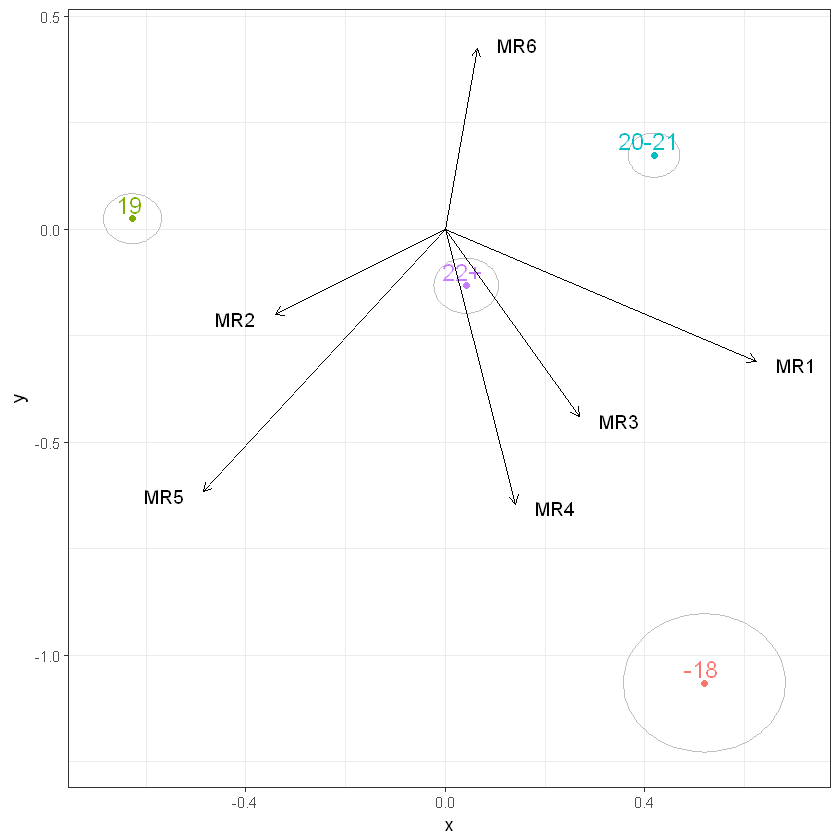

In [76]:
df <- data.frame(x=as.numeric(CoordGrupos[,1]), y=as.numeric(CoordGrupos[,2]), r=as.numeric(radio))

angle <- seq(-pi, pi, length = 100)

myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 1`,yend=`Dim 2`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 1`+.08*sign(CoordVar$`Dim 1`),y=CoordVar$`Dim 2`+.01*sign(CoordVar$`Dim 2`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")

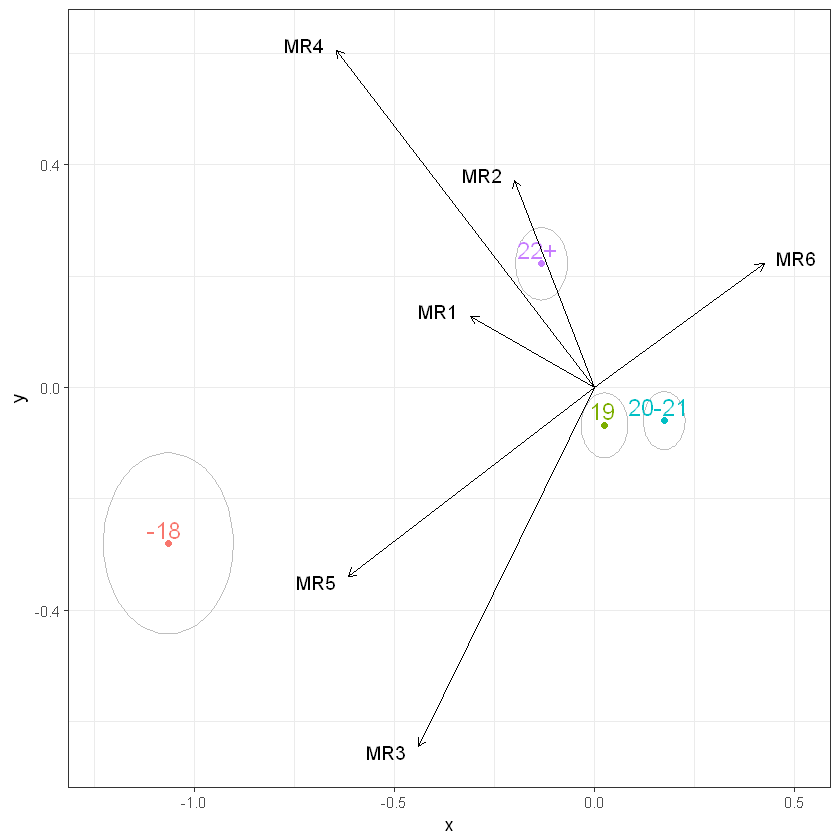

In [77]:
#stat_ellipse(data=CoordGrupos,aes(x=`Dim 1`,y=`Dim 2`,level=radio),type='euclid')
df <- data.frame(x=as.numeric(CoordGrupos[,2]), y=as.numeric(CoordGrupos[,3]), r=as.numeric(radio))
angle <- seq(-pi, pi, length = 100)
myplot <- ggplot()
for (i in 1:length(df$x)) {
        df_temp = data.frame(x = df$x[i] + df$r[i]*sin(angle), y = df$y[i] + df$r[i]*cos(angle))
        myplot = myplot + geom_polygon(data=df_temp, aes(x=x, y=y),color='grey', fill=NA,alpha=0.5, inherit.aes=F)
      }

myplot + geom_point(data=df, aes(x=x, y=y))+
geom_point(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,col=clase))+
geom_text(data=CoordGrupos,aes(x=`Dim 2`,y=`Dim 3`,label=rownames(CoordGrupos),col=clase),hjust=0.6, vjust=-0.3,size=5)+
geom_segment(aes(x=0,y=0,xend=`Dim 2`,yend=`Dim 3`),data=CoordVar,arrow = arrow(length = unit(0.2,"cm"),type='open'),size=0.5,col='black')+
geom_text(aes(x=CoordVar$`Dim 2`+.08*sign(CoordVar$`Dim 2`),y=CoordVar$`Dim 3`+.01*sign(CoordVar$`Dim 3`),label=rownames(CoordVar)),data=CoordVar,size=4)+
theme_bw()+theme(legend.position="none")